In [38]:
from basic import lp_Settings
import basic
import compute
import eedf
import seaborn as sns
import pandas as pd

In [39]:
#class instance, set temp and material properties. Unchanging for this analysis
c1 = lp_Settings() 
c1.set_m_i(40) 
c1.set_T_eV(300)
c1.set_skipheader(61)
c1.set_skipfooter(5)

In [40]:
c1.set_params(98.5,1000,4)
c1.set_probe_l(2)

In [41]:
c1.fname_fmt

'Trace_98p5mTorr_1000W_4.csv'

In [42]:
V,I,coeffs = basic.read_file(c1,11)
print("V:", V)
print("I:", I)

V: [-20.00917435 -19.95936203 -19.90902328 ...  29.86133194  29.91051674
  29.96089554]
I: [-0.0054662  -0.00547014 -0.0054656  ...  0.05254848  0.05260723
  0.05267166]


In [43]:
Vf = basic.floating_potential(V,coeffs)
print("Floating Potential: ", Vf, " V")

Vp,Ip = basic.plasma_potential(V,coeffs)


Floating Potential:  4.172219503673293  V


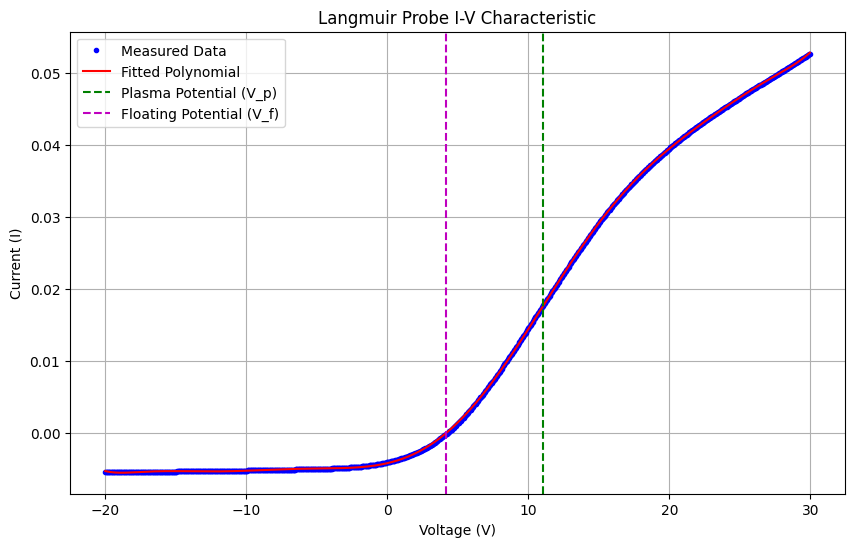

In [44]:
basic.plot_IV(V,I,coeffs,Vp,Vf)

In [45]:
te,ne,ie = compute.find_ne_te_iterative(c1)
print(ne)

Converged after 602 iterations.
2.1276217908257882e+19


In [46]:
E_eV_sorted, p_eV_sorted, f_eV_sorted, d2I_sorted, scale = eedf.eedf_data(c1,ie,ne)

(0.0, 20.0)

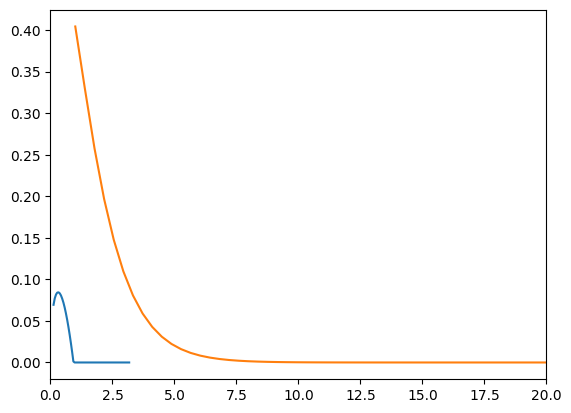

In [47]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(E_eV_sorted, f_eV_sorted/sum(f_eV_sorted), label='EEdata_all')
plt.plot(np.linspace(1,20), eedf.maxwellian((np.linspace(1,20)),te),label = 'Ideal')
plt.xlim(0,20)

In [48]:
#pressure : (power, idx)

data_0in = [
    ('16.6', 1000, 1, 0),
    ('16.6', 1000, 2, 0),
    ('16.6', 1000, 3, 0),
    ('16.6', 1000, 4, 0),
    ('16.6', 1000, 5, 0),
    ('10.8', 400, 1, 0),
    ('10.8', 400, 2, 0),
    ('10.8', 400, 3, 0),
    ('10.8', 400, 4, 0),
    ('10.8', 400, 5, 0),
    ('13.9', 600, 1, 0),
    ('13.9', 600, 2, 0),
    ('13.9', 600, 3, 0),
    ('13.9', 600, 4, 0),
    ('13.9', 600, 5, 0),
    ('17.5', 800, 1, 0),
    ('17.5', 800, 2, 0),
    ('17.5', 800, 3, 0),
    ('17.5', 800, 4, 0),
    ('17.5', 800, 5, 0),
    ('42.1', 1000, 1, 0),
    ('42.1', 1000, 2, 0),
    ('42.1', 1000, 3, 0),
    ('42.1', 1000, 4, 0),
    ('42.1', 1000, 5, 0),
    ('41.0', 400, 1, 0),
    ('41.0', 400, 2, 0),
    ('41.0', 400, 3, 0),
    ('41.0', 400, 4, 0),
    ('41.0', 400, 5, 0),
    ('41.1', 600, 1, 0),
    ('41.1', 600, 2, 0),
    ('41.1', 600, 3, 0),
    ('41.1', 600, 4, 0),
    ('41.1', 600, 5, 0),
    ('41.5', 800, 1, 0),
    ('41.5', 800, 2, 0),
    ('41.5', 800, 3, 0),
    ('41.5', 800, 4, 0),
    ('41.5', 800, 5, 0),
    ('75.1', 1000, 1, 0),
    ('75.1', 1000, 2, 0),
    ('75.1', 1000, 3, 0),
    ('75.1', 1000, 4, 0),
    ('75.1', 1000, 5, 0),
    ('72.5', 400, 1, 0),
    ('72.5', 400, 2, 0),
    ('72.5', 400, 3, 0),
    ('72.5', 400, 4, 0),
    ('72.5', 400, 5, 0),
    ('73.5', 600, 1, 0),
    ('73.5', 600, 2, 0),
    ('73.5', 600, 3, 0),
    ('73.5', 600, 4, 0),
    ('73.5', 600, 5, 0),
    ('74.3', 800, 1, 0),
    ('74.3', 800, 2, 0),
    ('74.3', 800, 3, 0),
    ('74.3', 800, 4, 0),
    ('74.3', 800, 5, 0),
    ('98.5', 1000, 1, 0),
    ('98.5', 1000, 2, 0),
    ('98.5', 1000, 3, 0),
    ('98.5', 1000, 4, 0),
    ('98.5', 1000, 5, 0),
    ('96.8', 400, 1, 0),
    ('96.8', 400, 2, 0),
    ('96.8', 400, 3, 0),
    ('96.8', 400, 4, 0),
    ('96.8', 400, 5, 0),
    ('96.8', 600, 1, 0),
    ('96.8', 600, 2, 0),
    ('96.8', 600, 3, 0),
    ('96.8', 600, 4, 0),
    ('96.8', 600, 5, 0),
    ('97.5', 800, 1, 0),
    ('97.5', 800, 2, 0),
    ('97.5', 800, 3, 0),
    ('97.5', 800, 4, 0),
    ('97.5', 800, 5, 0)
]

data_2in = [
    ('41.3', 400, 1, 2),
    ('41.3', 400, 2, 2),
    ('41.3', 400, 3, 2),
    ('41.3', 600, 1, 2),
    ('41.3', 600, 2, 2),
    ('41.3', 600, 3, 2),
    ('41.3', 800, 1, 2),
    ('41.3', 800, 2, 2),
    ('41.3', 800, 3, 2),
    ('41.6', 1000, 1, 2),
    ('41.6', 1000, 2, 2),
    ('41.6', 1000, 3, 2),
    ('97.8', 400, 1, 2),
    ('97.8', 400, 2, 2),
    ('97.8', 400, 3, 2),
    ('98.2', 600, 1, 2),
    ('98.2', 600, 2, 2),
    ('98.2', 600, 3, 2),
    ('98.2', 800, 1, 2),
    ('98.2', 800, 2, 2),
    ('98.2', 800, 3, 2),
    ('98.8', 1000, 1, 2),
    ('98.8', 1000, 2, 2),
    ('98.8', 1000, 3, 2)
]

data_4in = [
    ('40.9', 400, 1, 4),
    ('40.9', 400, 2, 4),
    ('40.9', 400, 3, 4),
    ('40.9', 600, 1, 4),
    ('40.9', 600, 2, 4),
    ('40.9', 600, 3, 4),
    ('41.2', 800, 1, 4),
    ('41.2', 800, 2, 4),
    ('41.2', 800, 3, 4),
    ('41.2', 1000, 1, 4),
    ('41.2', 1000, 2, 4),
    ('41.2', 1000, 3, 4),
    ('97.2', 400, 1, 4),
    ('97.2', 400, 2, 4),
    ('97.2', 400, 3, 4),
    ('98.0', 600, 1, 4),
    ('98.0', 600, 2, 4),
    ('98.0', 600, 3, 4),
    ('98.4', 800, 1, 4),
    ('98.4', 800, 2, 4),
    ('98.4', 800, 3, 4),
    ('98.9', 1000, 1, 4),
    ('98.9', 1000, 2, 4),
    ('98.9', 1000, 3, 4)
]

data_6in = [
    ('40.8', 400, 1, 6),
    ('40.8', 400, 2, 6),
    ('40.8', 400, 3, 6),
    ('41.0', 600, 1, 6),
    ('41.0', 600, 2, 6),
    ('41.0', 600, 3, 6),
    ('41.1', 800, 1, 6),
    ('41.1', 800, 2, 6),
    ('41.1', 800, 3, 6),
    ('41.2', 1000, 1, 6),
    ('41.2', 1000, 2, 6),
    ('41.2', 1000, 3, 6),
    ('97.0', 400, 1, 6),
    ('97.0', 400, 2, 6),
    ('97.0', 400, 3, 6),
    ('97.6', 600, 1, 6),
    ('97.6', 600, 2, 6),
    ('97.6', 600, 3, 6),
    ('98.1', 800, 1, 6),
    ('98.1', 800, 2, 6),
    ('98.1', 800, 3, 6),
    ('98.5', 1000, 1, 6),
    ('98.5', 1000, 2, 6),
    ('98.5', 1000, 3, 6)
]






In [50]:
temp_setting = lp_Settings()

data_arr_0 = np.zeros((len(data_0in),6))
ie_list_0 = np.zeros((len(data_0in),1)).tolist()

for i,tup in enumerate(data_0in):
    temp_setting.set_params(float(tup[0]), tup[1], tup[2])
    
    try:
        te,ne,ie = compute.find_ne_te_iterative(temp_setting)
    except:
        continue
    data_arr_0[i][0] = float(tup[0])
    data_arr_0[i][1] = tup[1]
    data_arr_0[i][2] = tup[2]
    data_arr_0[i][3] = tup[3]
    data_arr_0[i][4] = ne
    data_arr_0[i][5] = te
    ie_list_0[i] = ie
    print(f"Processed {tup}, ne: {ne}, te: {te}, ie: {ie}")


Converged after 241 iterations.
Processed ('16.6', 1000, 1, 0), ne: 8.994785290359106e+18, te: 1.4218351275037728, ie: [-0.00669778 -0.00669195 -0.00668469 ...  0.01442698  0.01446548
  0.01450875]
Maximum iterations reached without convergence.
Processed ('16.6', 1000, 2, 0), ne: 8.990825453709066e+18, te: 1.460161435273119, ie: [-0.00680467 -0.00680598 -0.00680511 ...  0.01475135  0.01478936
  0.01483382]
Converged after 499 iterations.
Processed ('16.6', 1000, 3, 0), ne: 8.969342542419114e+18, te: 1.4433264465652074, ie: [-0.00679791 -0.00679768 -0.00679678 ...  0.01503407  0.01507384
  0.01511989]
Converged after 893 iterations.
Processed ('16.6', 1000, 4, 0), ne: 8.984160559715062e+18, te: 1.4538346960864585, ie: [-0.0068355  -0.00683136 -0.00682974 ...  0.01526389  0.01530557
  0.01535304]
Converged after 397 iterations.
Processed ('16.6', 1000, 5, 0), ne: 8.950581291284218e+18, te: 1.43393802322275, ie: [-0.00680459 -0.00680455 -0.00680313 ...  0.01555628  0.01559814
  0.0156454

/Users/linusringstad/Documents/Fall 2025/NPRE 423/LP/Langmuir-Probe/langmuir_lib_dev/langmuir/src:/langmuir_LRingstad:/basic.py:256: RuntimeWarning: invalid value encountered in sqrt
  ne_new = np.sqrt(settings.pi*settings.m_i/Te_new_K/settings.k/8)*4*Ii/settings.Aprob/j_i_star/settings.e #new electron density in m^-3
/Users/linusringstad/Documents/Fall 2025/NPRE 423/LP/Langmuir-Probe/langmuir_lib_dev/langmuir/src:/langmuir_LRingstad:/basic.py:241: RuntimeWarning: invalid value encountered in sqrt
  Ii = 0.25*e*ne*(np.sqrt(8*k*Te_K/(np.pi*settings.m_i)))*settings.Aprob*j_i_star #ion current
/Users/linusringstad/Documents/Fall 2025/NPRE 423/LP/Langmuir-Probe/langmuir_lib_dev/langmuir/src:/langmuir_LRingstad:/basic.py:256: RuntimeWarning: invalid value encountered in sqrt
  ne_new = np.sqrt(settings.pi*settings.m_i/Te_new_K/settings.k/8)*4*Ii/settings.Aprob/j_i_star/settings.e #new electron density in m^-3
/Users/linusringstad/Documents/Fall 2025/NPRE 423/LP/Langmuir-Probe/langmuir_lib_d

Converged after 21 iterations.
Processed ('73.5', 600, 4, 0), ne: 3.1262122226262774e+18, te: 0.3091047485249195, ie: [-0.00488359 -0.0048838  -0.00488125 ...  0.00932693  0.00932248
  0.00932756]
Converged after 20 iterations.
Processed ('73.5', 600, 5, 0), ne: 3.13869029484006e+18, te: 0.29571529186808393, ie: [-0.0048491  -0.00484947 -0.00484703 ...  0.00934032  0.01305607
  0.01007251]
Converged after 32 iterations.
Processed ('74.3', 800, 1, 0), ne: 5.019639596766171e+18, te: 0.47468723136453855, ie: [-0.00664839 -0.00664866 -0.00664618 ...  0.01241691  0.01243225
  0.01245074]
Converged after 166 iterations.
Processed ('74.3', 800, 2, 0), ne: 5.04937260230317e+18, te: 0.4713047812692412, ie: [-0.0065574  -0.00655734 -0.00655478 ...  0.01248538  0.01250097
  0.01251928]
Converged after 15 iterations.
Processed ('74.3', 800, 3, 0), ne: 5.012360942053008e+18, te: 0.5042172755435911, ie: [-0.00655067 -0.0065501  -0.00654794 ...  0.01259402  0.01260971
  0.0126299 ]
Converged after 33

In [51]:
data_arr_2 = np.zeros((len(data_2in),6))
ie_list_2 = np.zeros((len(data_2in),1)).tolist()

temp_setting.set_probe_l(4e-3)


for i,tup in enumerate(data_2in):
    temp_setting.set_params(float(tup[0]), tup[1], tup[2],tup[3])
    print(temp_setting.fname_fmt)

    try:
        te,ne,ie = compute.find_ne_te_iterative(temp_setting)
    except:
        continue

    data_arr_2[i][0] = float(tup[0])
    data_arr_2[i][1] = tup[1]
    data_arr_2[i][2] = tup[2]
    data_arr_2[i][3] = tup[3]
    data_arr_2[i][4] = ne
    data_arr_2[i][5] = te
    ie_list_2[i] = ie
    print(f"Processed {tup}, ne: {ne}, te: {te}, ie: {ie}")


data_arr_4 = np.zeros((len(data_4in),6))
ie_list_4 = np.zeros((len(data_4in),1)).tolist()
for i,tup in enumerate(data_4in):
    temp_setting.set_params(float(tup[0]), tup[1], tup[2],tup[3])
    try:
        te,ne,ie = compute.find_ne_te_iterative(temp_setting)
    except:
        continue
    data_arr_4[i][0] = float(tup[0])
    data_arr_4[i][1] = tup[1]
    data_arr_4[i][2] = tup[2]
    data_arr_4[i][3] = tup[3]
    data_arr_4[i][4] = ne
    data_arr_4[i][5] = te
    ie_list_4[i] = ie
    print(f"Processed {tup}, ne: {ne}, te: {te}, ie: {ie}")

data_arr_6 = np.zeros((len(data_6in),6))
ie_list_6 = np.zeros((len(data_6in),1)).tolist()
for i,tup in enumerate(data_6in):
    temp_setting.set_params(float(tup[0]), tup[1], tup[2],tup[3])
    try:
    
        te,ne,ie = compute.find_ne_te_iterative(temp_setting)

    except:
        continue
    data_arr_6[i][0] = float(tup[0])
    data_arr_6[i][1] = tup[1]
    data_arr_6[i][2] = tup[2]
    data_arr_6[i][3] = tup[3]
    data_arr_6[i][4] = ne
    data_arr_6[i][5] = te
    ie_list_6[i] = ie
    print(f"Processed {tup}, ne: {ne}, te: {te}, ie: {ie}")


Trace_41p3mTorr_400W_2in_1.csv
Converged after 146 iterations.
Processed ('41.3', 400, 1, 2), ne: 3.67923106865761e+18, te: 0.8741321545515479, ie: [-0.00213783 -0.00213766 -0.00213751 ...  0.00597607  0.00598588
  0.00599761]
Trace_41p3mTorr_400W_2in_2.csv
Maximum iterations reached without convergence.
Processed ('41.3', 400, 2, 2), ne: 3.532330467460071e+18, te: 0.9541009302013644, ie: [-0.00214683 -0.00214669 -0.00214656 ...  0.00584887  0.00587573
  0.00588682]
Trace_41p3mTorr_400W_2in_3.csv
Maximum iterations reached without convergence.
Processed ('41.3', 400, 3, 2), ne: 3.4149031064612797e+18, te: 1.0139198128411346, ie: [-0.00213441 -0.00213427 -0.00213414 ...  0.00584781  0.00585788
  0.00587049]
Trace_41p3mTorr_600W_2in_1.csv
Converged after 71 iterations.
Processed ('41.3', 600, 1, 2), ne: 5.330356692650635e+18, te: 1.0495468730707813, ie: [-0.00324758 -0.00324743 -0.00324728 ...  0.00904151  0.00905853
  0.00907812]
Trace_41p3mTorr_600W_2in_2.csv
Maximum iterations reached

In [52]:


cols = ['Pressure', 'Power', 'Trial', 'Length', 'ne', 'Te']

data0 = pd.DataFrame(data_arr_0, columns=cols)
data2 = pd.DataFrame(data_arr_2, columns=cols)
data4 = pd.DataFrame(data_arr_4, columns=cols)
data6 = pd.DataFrame(data_arr_6, columns=cols)


data_all = pd.concat([data0, data2, data4, data6], ignore_index=True)


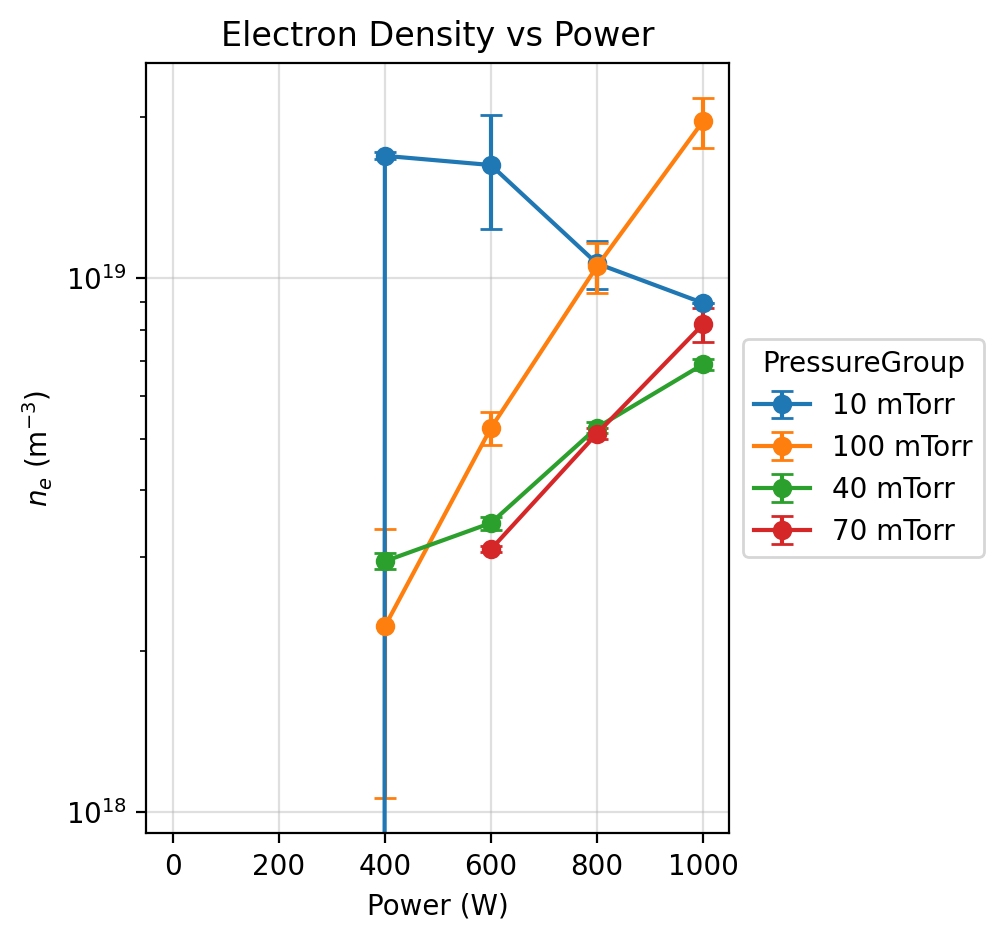

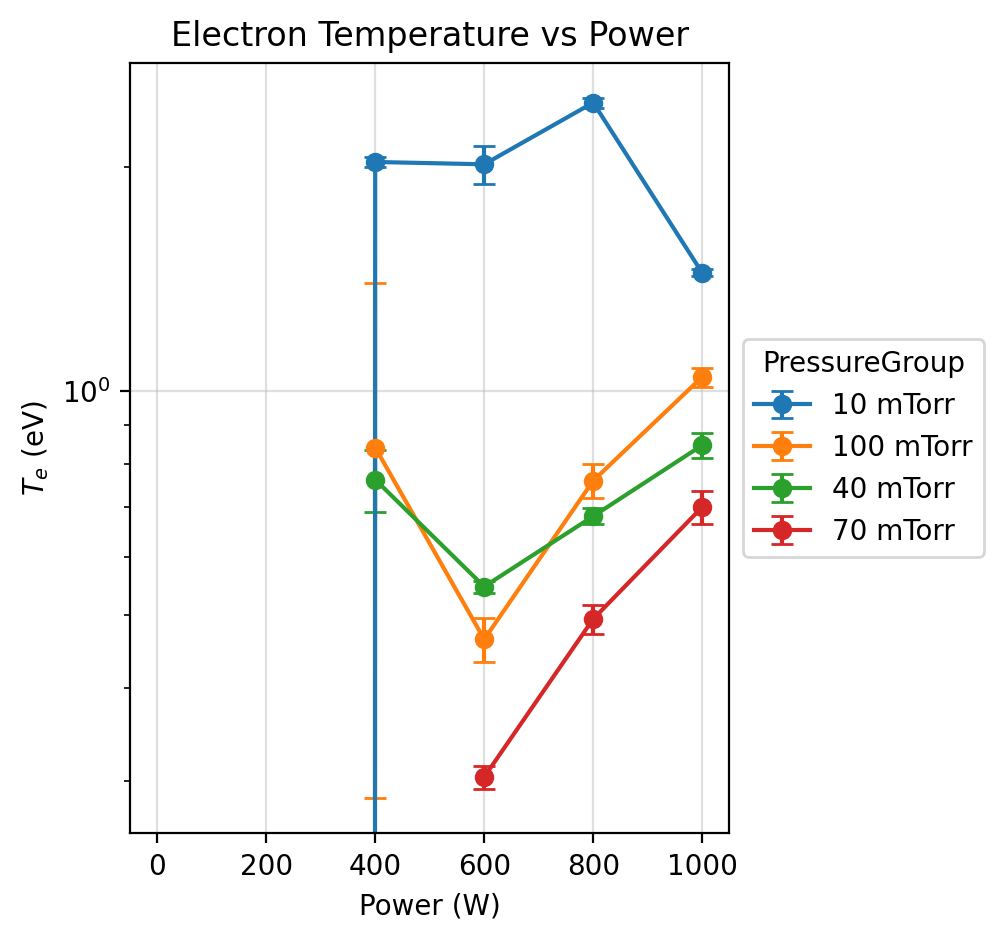

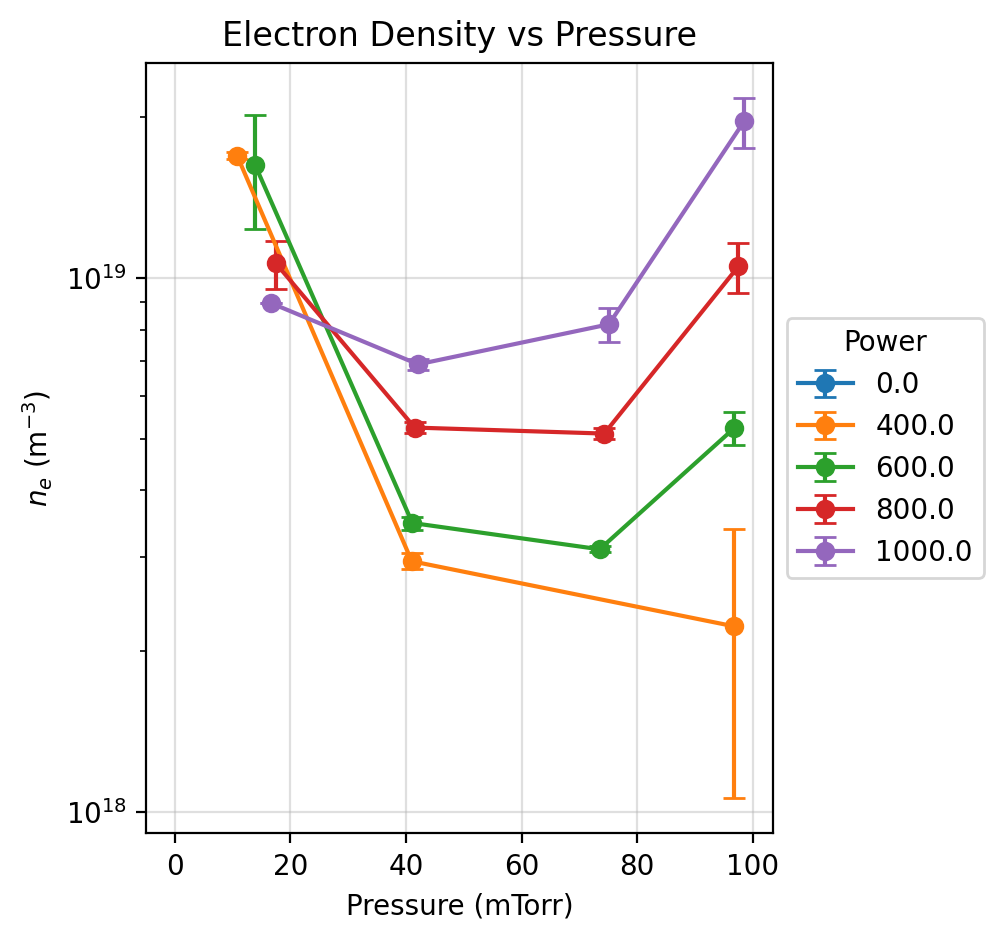

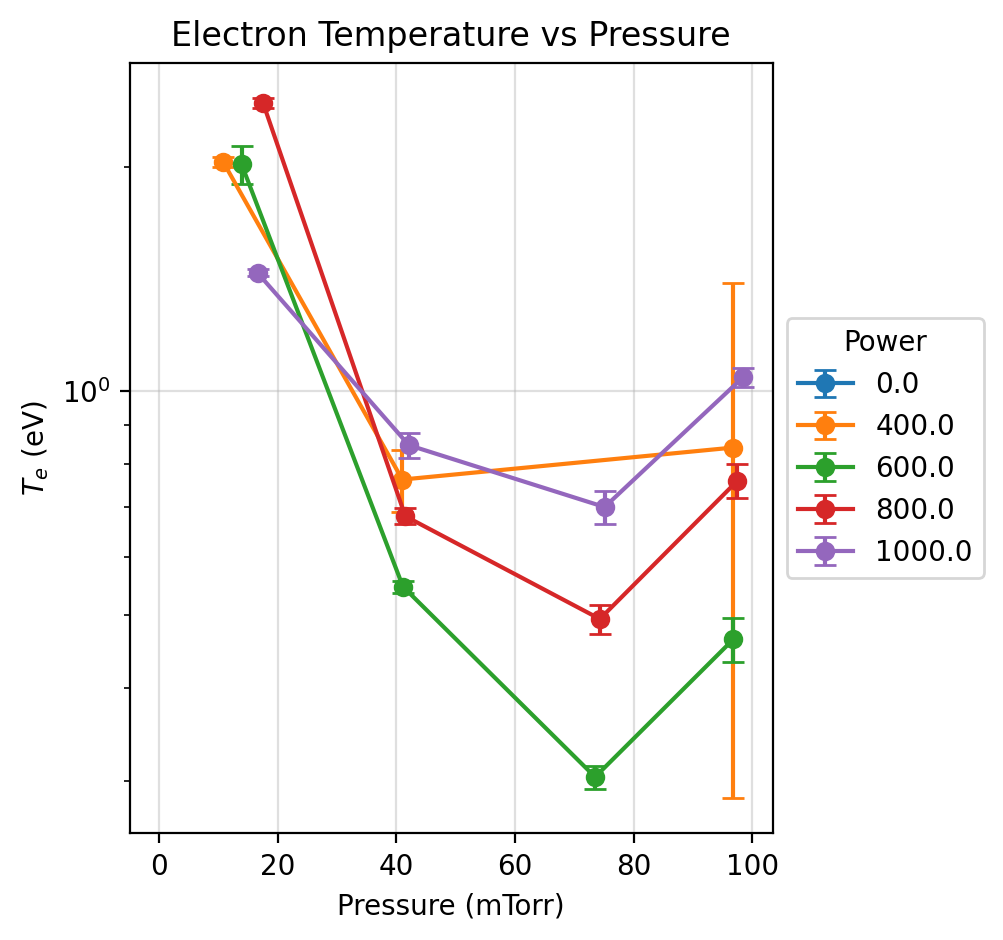

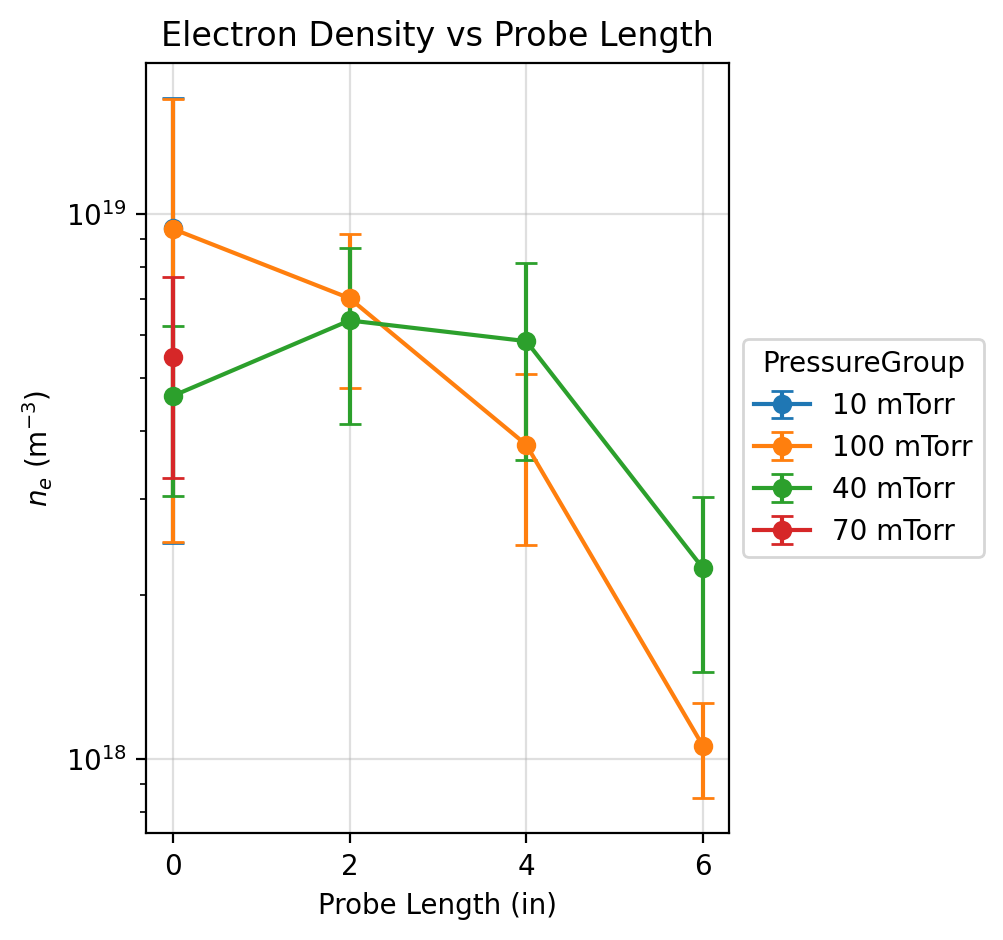

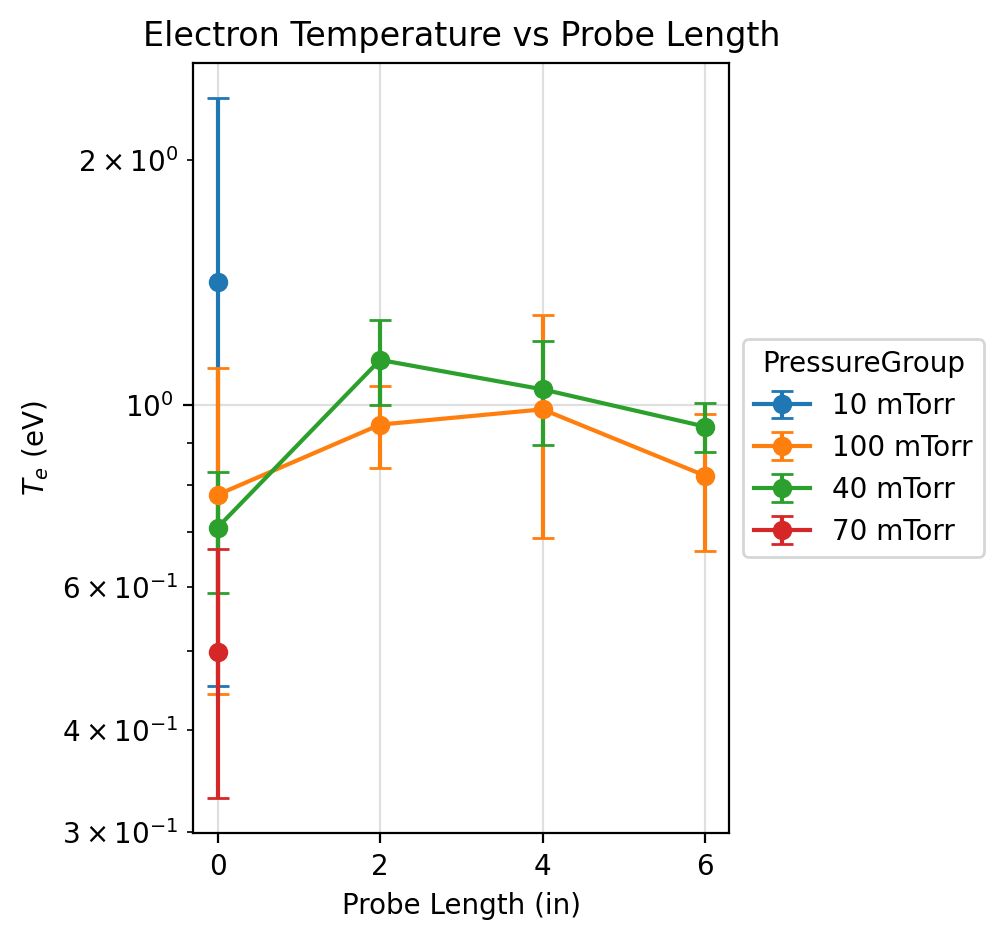

In [53]:
# ===== BIN PRESSURE RANGES =====
bins = [0, 20, 50, 80, 110]
labels = ['10 mTorr', '40 mTorr', '70 mTorr', '100 mTorr']
data_all['PressureGroup'] = pd.cut(data_all['Pressure'], bins=bins, labels=labels, include_lowest=True)

# ===== HELPER PLOTTING FUNCTION =====
def plot_grouped(data, xcol, groupcol, ycol, xlabel, ylabel, title, logy=True, legend_outside=True):
    plt.figure(dpi=200)
    for g in sorted(data[groupcol].dropna().unique()):
        sub = data[data[groupcol] == g]
        grouped = sub.groupby(xcol).agg({ycol: ['mean', 'std']})
        x = grouped.index.values
        y = grouped[ycol]['mean'].values
        yerr = grouped[ycol]['std'].values
        plt.errorbar(x, y, yerr=yerr, fmt='o-', capsize=4, label=f'{g}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, alpha=0.4)
    if logy:
        plt.yscale('log')
    # Move legend slightly off the plot to the right
    if legend_outside:
        plt.legend(title=groupcol, loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        plt.legend(title=groupcol, loc='best')
    plt.tight_layout(rect=[0, 0, 0.8, 1])  # Leave room for legend outside

# ===== 1. ne, Te vs Power (grouped by Pressure, length=0 only) =====
data_len0 = data_all[data_all['Length'] == 0]
plot_grouped(data_len0, 'Power', 'PressureGroup', 'ne',
             'Power (W)', r'$n_e$ (m$^{-3}$)', 'Electron Density vs Power')
plot_grouped(data_len0, 'Power', 'PressureGroup', 'Te',
             'Power (W)', r'$T_e$ (eV)', 'Electron Temperature vs Power')
plt.show()

# ===== 2. ne, Te vs Pressure (grouped by Power, length=0 only) =====
plot_grouped(data_len0, 'Pressure', 'Power', 'ne',
             'Pressure (mTorr)', r'$n_e$ (m$^{-3}$)', 'Electron Density vs Pressure')
plot_grouped(data_len0, 'Pressure', 'Power', 'Te',
             'Pressure (mTorr)', r'$T_e$ (eV)', 'Electron Temperature vs Pressure')
plt.show()

# ===== 3. ne, Te vs Length (grouped by PressureGroup, use all data) =====
plot_grouped(data_all, 'Length', 'PressureGroup', 'ne',
             'Probe Length (in)', r'$n_e$ (m$^{-3}$)', 'Electron Density vs Probe Length')
plot_grouped(data_all, 'Length', 'PressureGroup', 'Te',
             'Probe Length (in)', r'$T_e$ (eV)', 'Electron Temperature vs Probe Length')
plt.show()
